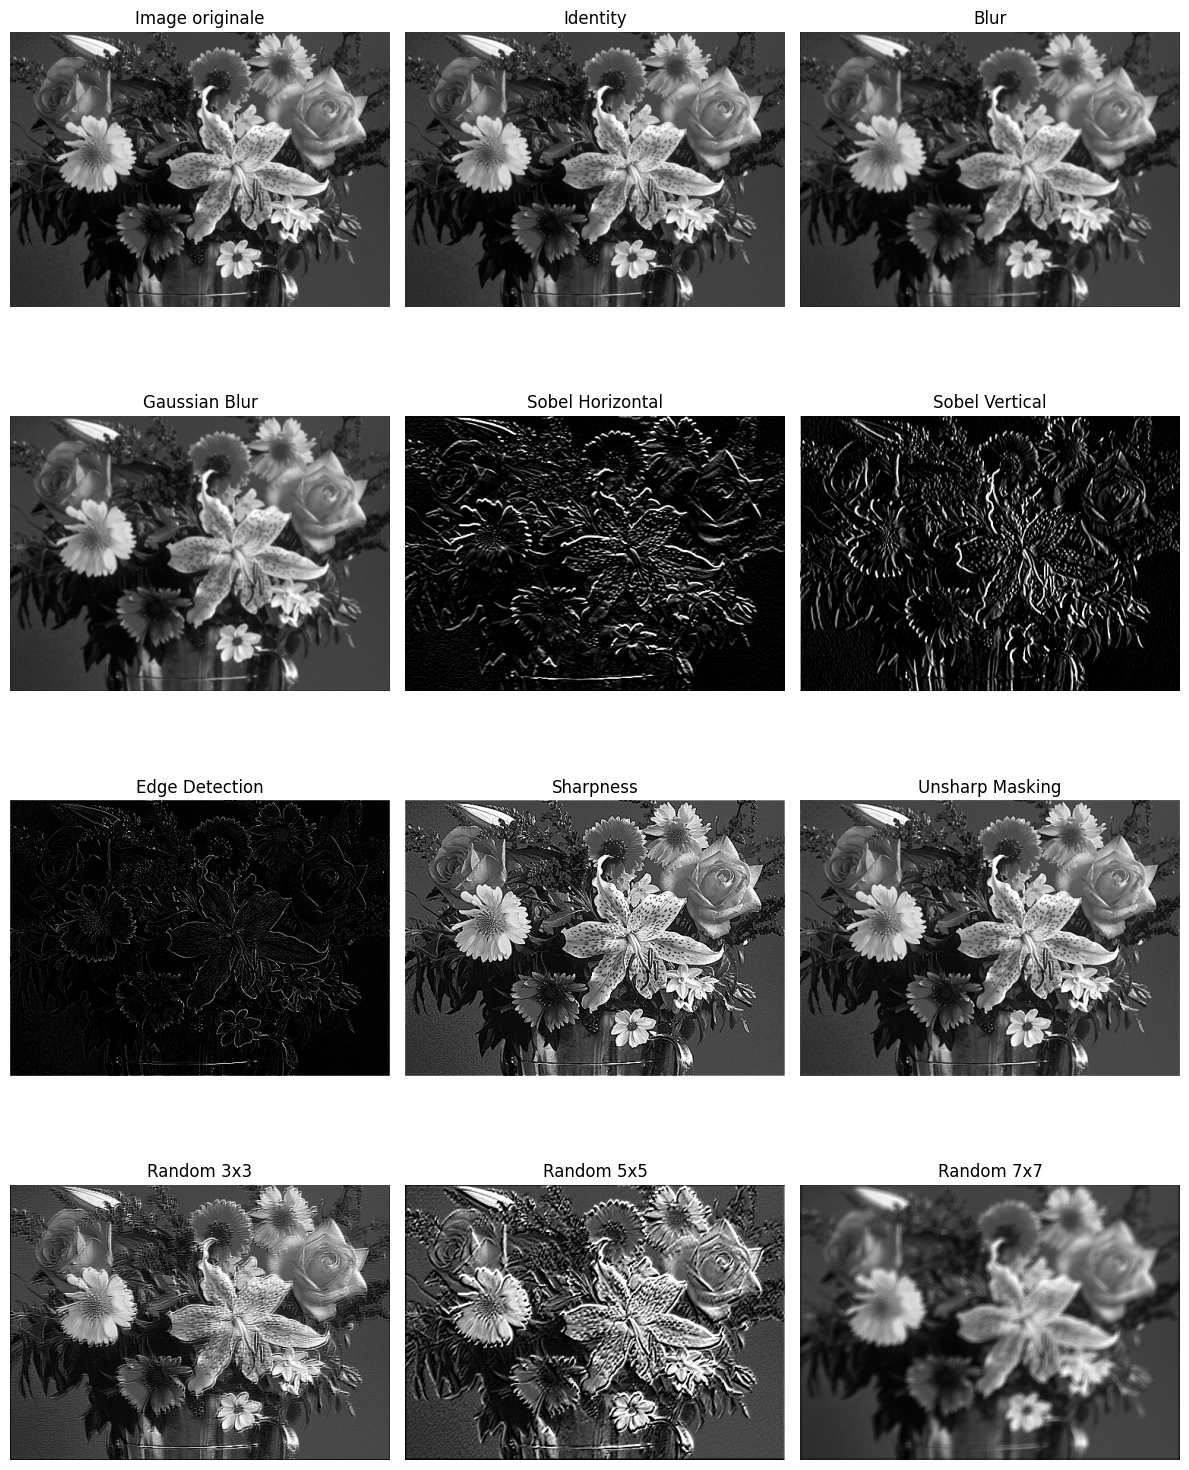

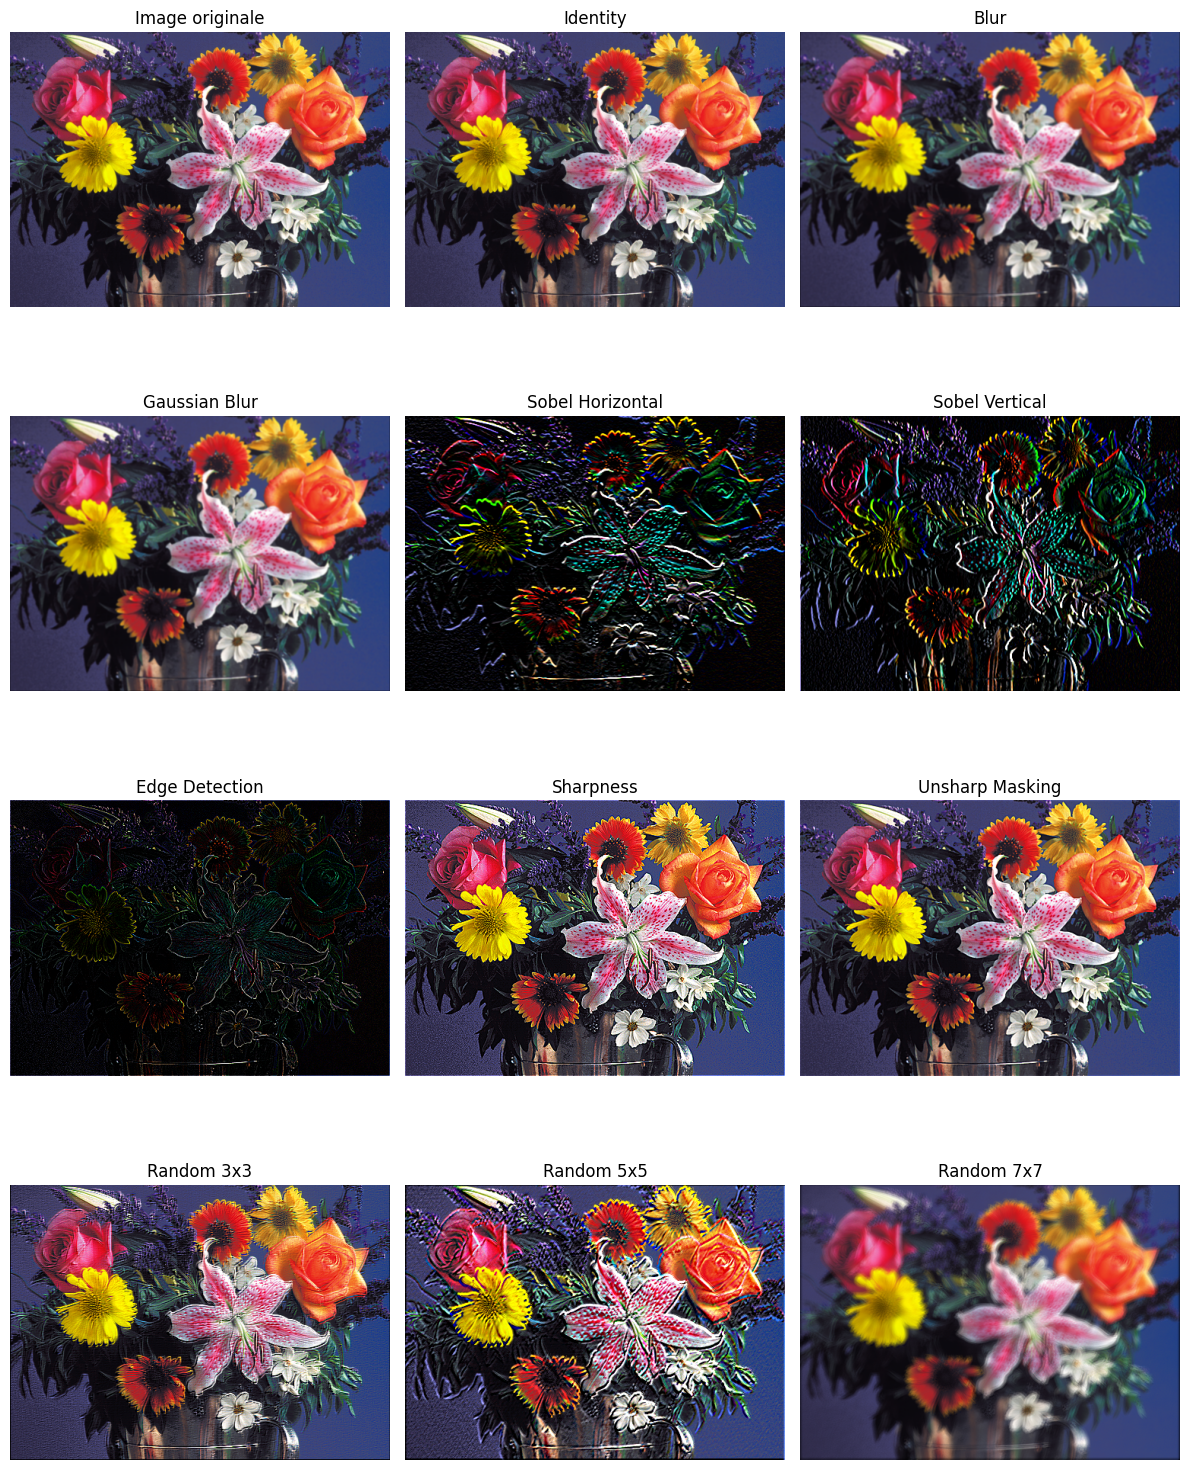

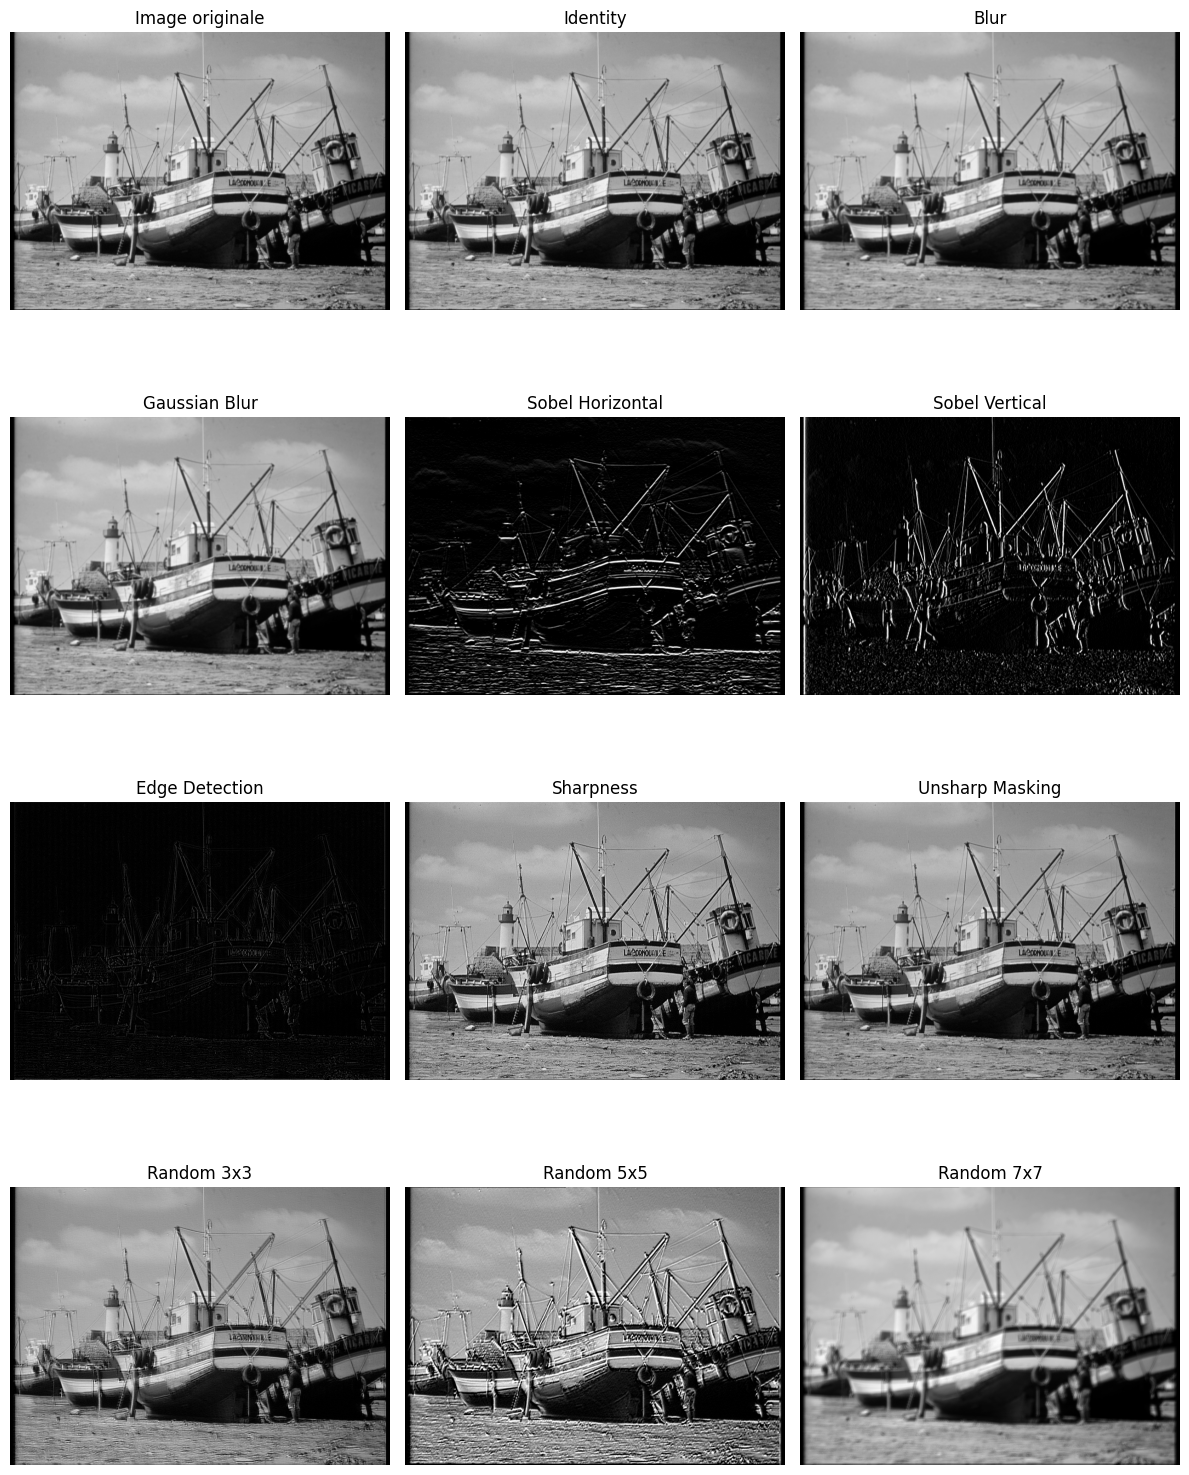

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import math

# Function to load an image
def image_load(image_path, channel):
    assert os.path.isfile(image_path), f" Fichier non trouvé : {image_path}"
    if channel not in [1, 3]:
        raise ValueError("Channel must be 1 (Gray) or 3 (RGB)")
    
    if channel == 1:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        assert image is not None, f"Error: Unable to load grayscale image from {image_path}"
        return image
    else:
        image = cv2.imread(image_path  )
        assert image is not None, f"Error: Unable to load RGB image from {image_path}"
        rgb_image = cv2 . cvtColor ( image , cv2 . COLOR_BGR2RGB )
        return image

# Function to apply convolution on a single channel
def convolve_channel(image, kernel):
    # Assertions for dimensions
    assert image.shape[0] >= kernel.shape[0], "Image is too small for kernel in height"
    assert image.shape[1] >= kernel.shape[1], "Image is too small for kernel in width"

    # Get dimensions
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2

    # Add padding
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    output = np.zeros_like(image, dtype=np.float32)

    # Apply convolution
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output



# Function to apply convolution
def apply_convolution(image, kernel):
    """
    Applies 2D convolution to a grayscale or RGB image using the given kernel.
    
    Parameters:
    - image (np.ndarray): Input image, can be grayscale or RGB.
    - kernel (np.ndarray): 2D square matrix with odd dimensions.
    
    Returns:
    - np.ndarray: Filtered image with same shape, values clipped to [0, 255] .
    """

    # Assertions to validate inputs
    assert isinstance(image, np.ndarray), "Image must be a NumPy array"
    assert isinstance(kernel, np.ndarray), "Kernel must be a NumPy array"
    assert len(kernel.shape) == 2, "Kernel must be a 2D matrix"
    assert kernel.shape[0] == kernel.shape[1], "Kernel must be square"
    assert kernel.shape[0] % 2 == 1, "Kernel must have an odd size"
    assert len(image.shape) in [2, 3], "Image must be grayscale (2D) or RGB (3D)"

    if len(image.shape) == 3:  # RGB image
        assert image.shape[2] == 3, "RGB image must have 3 channels"
        height, width, channels = image.shape
        output = np.zeros_like(image, dtype=np.float32)
        # Apply filter on each channel
        for c in range(channels):
            output[:, :, c] = convolve_channel(image[:, :, c], kernel)
    else:  # Grayscale image
        output = convolve_channel(image, kernel)

    # Normalize 
    output = np.clip(output, 0, 255)
    assert image.shape == output.shape
    return output.astype(np.uint8)


# Function to load convolution
def image_load(image_path, channel):
    """
    Load an image in grayscale  or RGB .
    """
    assert os.path.isfile(image_path), f"Fichier non trouvé : {image_path}"
    if channel not in (1, 3):
        raise ValueError("Channel must be 1 (Gray) or 3 (RGB)")
    if channel == 1:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        assert img is not None, f"Erreur de chargement de l’image : {image_path}"
        return img
    else:
        bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        assert bgr is not None, f"Erreur de chargement de l’image couleur : {image_path}"
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        return rgb   # return the converted RGB

        
# Function to display convolution
def display_images(original, filtered_images, titles):
    all_images = [original] + filtered_images
    all_titles = ["Image originale"] + titles
    total = len(all_images)
    rows = 4
    cols = math.ceil(total / rows)
    
    plt.figure(figsize=(4 * cols, 4 * rows))
    for idx, (img, title) in enumerate(zip(all_images, all_titles), start=1):
        plt.subplot(rows, cols, idx)
        plt.title(title)
        plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Définition des kernels
# 1. Blur (Moyenne 3x3)
blur_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
], dtype=np.float32)

# 2. Sobel Horizontal
sobel_horizontal = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# 3. Sobel Vertical
sobel_vertical = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=np.float32)

# 4. Sharpness (renforcement)
sharpness_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], dtype=np.float32)

# 5–7. Noyaux aléatoires normalisés
np.random.seed(180)

random_kernel_3x3 = np.random.randint(-5, 5 , size = (3,3) ).astype(np.float32)
random_kernel_3x3 /= np.sum(random_kernel_3x3)

random_kernel_5x5 = np.random.randint(-5, 5 , size = (5,5) ).astype(np.float32)
random_kernel_5x5 /= np.sum(random_kernel_5x5)

random_kernel_7x7 = np.random.randint(-5, 5 , size = (7,7) ).astype(np.float32)
random_kernel_7x7 /= np.sum(random_kernel_7x7)

# 8. Identity
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
], dtype=np.float32)

# 9. Edge Detection (Laplacian)
edge_kernel = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
], dtype=np.float32)

# 10. Gaussian Blur (3x3)
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32)
gaussian_kernel /= np.sum(gaussian_kernel)

# 11. Unsharp Masking (5x5)
unsharp_kernel = np.array([
    [-1, -4,  -6, -4, -1],
    [-4, -16, -24, -16, -4],
    [-6, -24, 476, -24, -6],
    [-4, -16, -24, -16, -4],
    [-1, -4,  -6, -4, -1]
], dtype=np.float32)
unsharp_kernel /= 256.0

# List of all kernels
kernels = {
    "Identity": identity_kernel,
    "Blur": blur_kernel,
    "Gaussian Blur": gaussian_kernel,
    "Sobel Horizontal": sobel_horizontal,
    "Sobel Vertical": sobel_vertical,
    "Edge Detection": edge_kernel,
    "Sharpness": sharpness_kernel,
    "Unsharp Masking": unsharp_kernel,
    "Random 3x3": random_kernel_3x3,
    "Random 5x5": random_kernel_5x5,
    "Random 7x7": random_kernel_7x7,
}

# Main execution
racine = "images/"
if __name__ == "__main__":
    for path in ["img1.bmp" , "img2.bmp"] :
        image_path = os.path.join(racine, path)

        gray_image = image_load(image_path, 1)  # Grayscale
        rgb_image = image_load(image_path, 3)   # RGB
        filtered_images = []
        titles = []
        # Apply filters to grayscale image
        for kernel_name, kernel in kernels.items():
            filtered = apply_convolution(gray_image, kernel)
            filtered_images.append(filtered)
            titles.append(kernel_name)
            # Save
            cv2.imwrite(f'{kernel_name.lower().replace(" ", "_")}_gray.jpg', filtered)
        # Display
        display_images(gray_image, filtered_images, titles)
        # Apply filters to RGB image
        filtered_images = []
        titles = []
        for kernel_name, kernel in kernels.items():
            filtered = apply_convolution(rgb_image, kernel)
            filtered_images.append(filtered)
            titles.append(kernel_name)
            # Save 
            cv2.imwrite(f'{kernel_name.lower().replace(" ", "_")}_rgb.jpg', cv2.cvtColor(filtered, cv2.COLOR_RGB2BGR))
        # Display
        display_images(rgb_image, filtered_images, titles)